![picture](https://drive.google.com/uc?id=1fKl1AgT3f2nW2h-44Ea7zmJa4qd7gHhy)

FalconCV is an open-source Python library that offers developers an interface to interact with some of the most popular computer vision frameworks, such as TensorFlow Object detection API and Detectron.
The main objective behind it is to unify the set of tools available and simplify the use of them. This library is focused mainly on Computer Vision practitioners but also is flexible enough to allow researchers to configure the models at a low-level.
Additionally, taking advantage of the fantastic features that OpenVINO offers, a custom model can be trained and optimized to run efficiently in the target hardware with just a few lines of code. It is important to say that FalconCV does not attempt to replace any of the tools mentioned previously; instead, it takes the best of them and offers a solution to improve accessibility to new users.

## Step 1: Install falconCV dependencies



In [0]:
!pip install matplotlib
!pip install numpy==1.17
!pip install opencv-contrib-python
!pip install pillow
!pip install cython
!pip install tqdm
!pip install scipy
!pip install requests 
!pip install clint
!pip install validators
!pip install more-itertools
!pip install pandas
!pip install imutils
!pip install boto3
!pip install "dask[complete]" 
!pip install lxml
!pip install Mako
!pip install colorlog
!pip install colorama
!pip install bs4
!pip install pick
!pip install -U scikit-learn
!pip install gitpython
!pip install cython
!pip install pycocotools
!pip install omegaconf
!pip install wxPython

!sudo apt install protobuf-compiler

## Step 2: Check Tensorflow Version and GPU Support



In [2]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.2


In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Step 3: Install falconcv

In [0]:
!pip uninstall falconcv -y && pip install git+https://github.com/haruiz/FalconCV.git

## Step 4: Make Dataset
FalconCV offer different alternatives to create custom datasets; the user can download images from OpenImages or Coco dataset, or download images from Flicker or Bing




**COCO Dataset**

COCO is a large-scale object detection, segmentation, and captioning dataset. COCO has several features:

In [4]:
from falconcv.ds import *
from falconcv.util import FileUtil,ImageUtil, ColorUtil
import os

# labels map
labels_map = {"bird": 1,"cat": 2}
# palete color
color_palette = ColorUtil.color_palette(n=len(labels_map))
# create dataset
dataset=Coco(v=2017) # only 2017 version is supported
dataset.setup(split="train", task="segmentation")
#create ouput folder
out_folder = "images"    
os.makedirs(out_folder, exist_ok=True)
# optional: clear folder if already exists 
FileUtil.clear_folder(out_folder)
# download images
for batch_images in dataset.fetch(
        n=50, # n of images by class
        labels=list(labels_map.keys()),# target labels
        batch_size=100# n images to load in memory
    ):
    # access to batch images
    for img in batch_images:
        # export image to disk
        img.export(out_folder, labels_map, color_palette)    
        for region in img.regions:
            pass#print(region.shape_attributes["x"], region.shape_attributes["y"])

INFO     Downloading Coco dataset dependencies, it can take a few minutes
DEBUG    [INFO]: downloading file : http://images.cocodataset.org/annotations/annotations_trainval2017.zip
downloading file annotations_trainval2017.zip: 100%|██████████| 253M/253M [00:03<00:00, 65.2MiB/s]
DEBUG    [INFO]: File (http://images.cocodataset.org/annotations/annotations_trainval2017.zip) download done
INFO     Download dependencies done


loading annotations into memory...
Done (t=15.51s)
creating index...
index created!


INFO     downloading images for : bird
INFO     downloading batch 1/1
INFO     downloading images for : cat
INFO     downloading batch 1/1


## Step 5: Visualize data

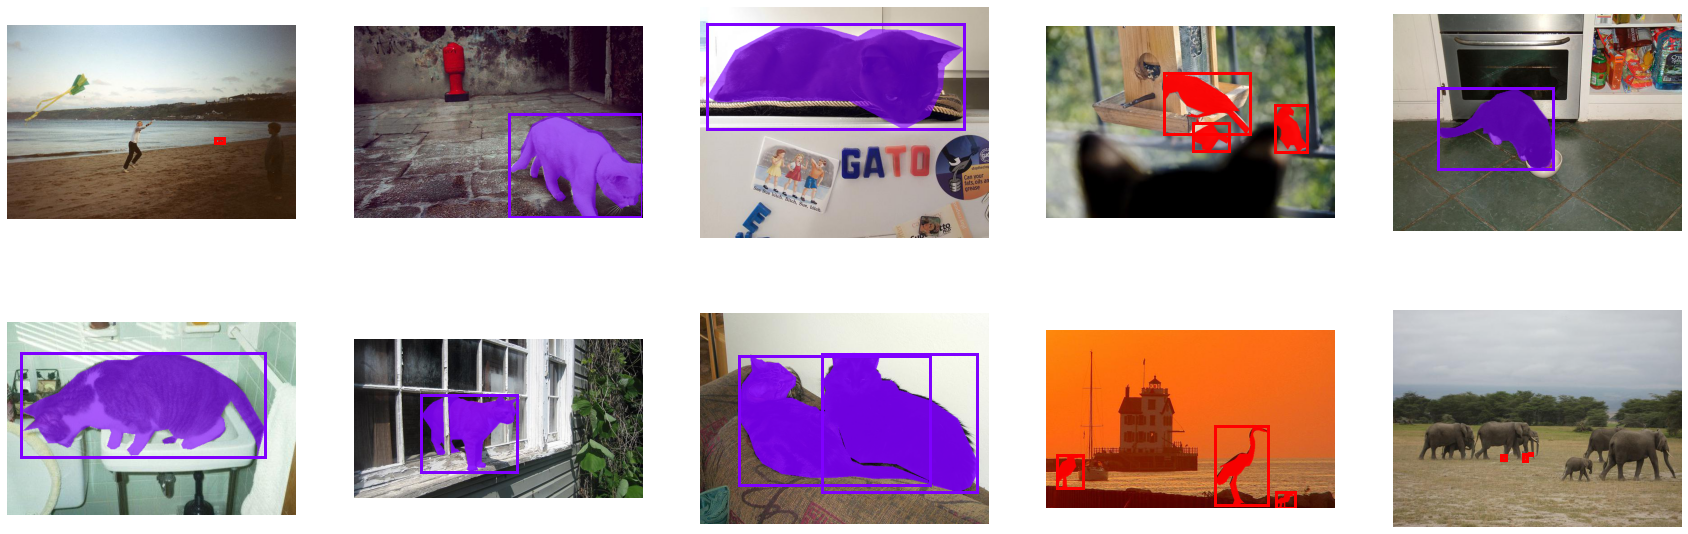

In [7]:
from falconcv.util import VIUtil
VIUtil.make_grid(out_folder,labels_map=labels_map, n=10, rows=2, figsize=(30,10))